In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [3]:
# Thanks to Vivian
def clean_epsilon(cell):
    if cell - 0.0 < 0.0001:
        return 0
    return cell

In [4]:
demo = pd.read_sas('DEMO_I.XPT')
demo_new = demo.drop(['RIDRETH1', 'RIDEXMON', 'RIDEXAGM','SDDSRVYR',\
          'RIDSTATR', 'DMQADFC', 'RIDEXPRG', 'SIALANG', 'DMQMILIZ',\
          'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'DMDYRSUS',\
          'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAPROXY',\
          'AIALANGA', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE',\
          'DMDHRGND', 'DMDHRAGE', 'DMDHRBR4', 'WTINT2YR',\
          'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA'], axis=1)
demo_new.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH3,DMDBORN4,DMDCITZN,DMDEDUC3,DMDEDUC2,DMDMARTL,MIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHREDU,DMDHRMAR,DMDHSEDU,INDHHIN2,INDFMIN2,INDFMPIR
count,9971.000000,9971.000000,9.971000e+03,6.950000e+02,9971.000000,9971.000000,9969.000000,2.647000e+03,5719.000000,5719.000000,6978.000000,9971.000000,9971.000000,9575.000000,9909.000000,5226.000000,9626.000000,9642.000000,8.919000e+03
mean,88717.000000,1.509377,3.189941e+01,1.078561e+01,3.213118,1.243907,1.128197,5.988666e+00,3.439587,2.650988,1.950416,3.892990,3.772641,3.459530,2.813503,3.596441,11.522439,11.252126,2.269277e+00
std,2878.524101,0.499937,2.476883e+01,7.015325e+00,1.679606,1.446152,0.422122,5.873498e+00,1.314679,2.671713,0.217100,1.745113,1.808749,1.331829,5.962991,1.381068,15.191049,15.219413,1.576345e+00
min,83732.000000,1.000000,5.397605e-79,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79
25%,86224.500000,1.000000,9.000000e+00,5.000000e+00,2.000000,1.000000,1.000000,2.000000e+00,3.000000,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,6.000000,5.000000,9.700000e-01
50%,88717.000000,2.000000,2.700000e+01,1.000000e+01,3.000000,1.000000,1.000000,5.000000e+00,4.000000,1.000000,2.000000,4.000000,4.000000,4.000000,1.000000,4.000000,8.000000,8.000000,1.820000e+00
75%,91209.500000,2.000000,5.300000e+01,1.700000e+01,4.000000,1.000000,1.000000,9.000000e+00,4.000000,5.000000,2.000000,5.000000,5.000000,4.000000,4.000000,5.000000,14.000000,14.000000,3.480000e+00
max,93702.000000,2.000000,8.000000e+01,2.400000e+01,7.000000,99.000000,9.000000,9.900000e+01,9.000000,99.000000,2.000000,7.000000,7.000000,9.000000,99.000000,9.000000,99.000000,99.000000,5.000000e+00


In [5]:
count_male  = len(demo_new['RIAGENDR'][demo_new['RIAGENDR']==1])
count_female = len(demo_new['RIAGENDR'][demo_new['RIAGENDR']==2])
print("The number of men in this survey is", count_male)
print("The number of women in this survey is", count_female)

The number of men in this survey is 4892
The number of women in this survey is 5079


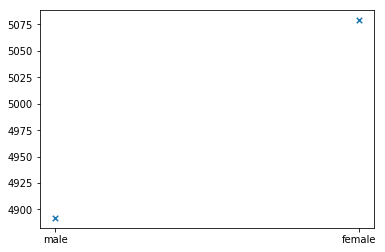

In [6]:
fig1 = plt.figure(1)
plt.subplot(111)
fig1_x = ['male', 'female']
fig1_y = [count_male, count_female]
plt.scatter(fig1_x, fig1_y, marker = 'x', label = '1', s = 30)

Check whether the distribution of gender toward age is uniform


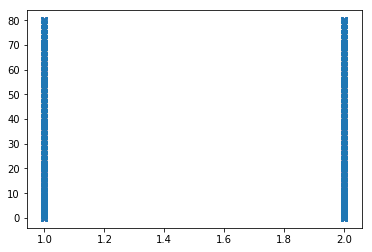

In [7]:
print("Check whether the distribution of gender toward age is uniform")
fig2 = plt.figure(1)
plt.subplot(111)
fig2_x = demo_new['RIAGENDR']
fig2_y = demo_new['RIDAGEYR']
plt.scatter(fig2_x, fig2_y, marker = 'x', label = '1', s = 30)
plt.show()

Check the distribution of age


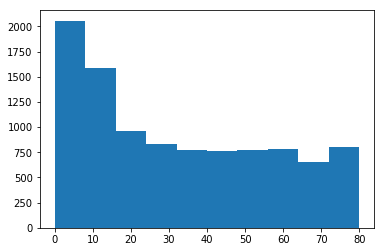

This is not normal or uniform. A bad distribution.


In [8]:
print("Check the distribution of age")
fig3 = plt.figure(1)
plt.subplot(111)
fig3_data = demo_new['RIDAGEYR']
plt.hist(fig3_data)
plt.show()
print("This is not normal or uniform. A bad distribution.")

Check the distribution of age


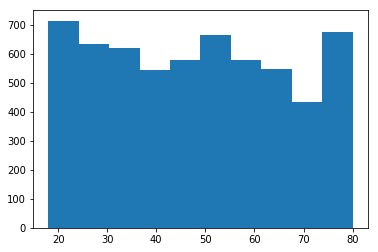

IT's better to study the adults.


In [9]:
print("Check the distribution of age")
fig3 = plt.figure(1)
plt.subplot(111)
fig3_data = demo_new[demo_new['RIDAGEYR']>=18]['RIDAGEYR']
plt.hist(fig3_data)
plt.show()
print("IT's better to study the adults.")

In [10]:
demo_new2 = demo_new[demo_new['RIDAGEYR']>=18].drop('RIDAGEMN', axis = 1)
demo_new2.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDCITZN,DMDEDUC3,DMDEDUC2,DMDMARTL,MIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHREDU,DMDHRMAR,DMDHSEDU,INDHHIN2,INDFMIN2,INDFMPIR
count,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5991.000000,273.000000,5719.000000,5719.000000,5222.000000,5992.000000,5992.000000,5738.000000,5953.000000,2937.000000,5760.000000,5772.000000,5.316000e+03
mean,88676.950935,1.518191,48.121996,3.236482,1.351469,1.184276,13.567766,3.439587,2.650988,1.938338,3.309913,3.151869,3.460962,2.630438,3.540007,11.703819,11.323458,2.409253e+00
std,2877.819691,0.499711,18.521353,1.640230,1.347104,0.492101,6.577870,1.314679,2.671713,0.240564,1.725702,1.784491,1.317859,4.315921,1.359640,15.842496,15.869623,1.603954e+00
min,83732.000000,1.000000,18.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79
25%,86175.750000,1.000000,32.000000,2.000000,1.000000,1.000000,12.000000,3.000000,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,5.000000,5.000000,1.060000e+00
50%,88659.500000,2.000000,48.000000,3.000000,1.000000,1.000000,13.000000,4.000000,1.000000,2.000000,3.000000,3.000000,4.000000,1.000000,4.000000,8.000000,8.000000,1.980000e+00
75%,91174.250000,2.000000,63.000000,4.000000,2.000000,1.000000,13.000000,4.000000,5.000000,2.000000,5.000000,4.000000,5.000000,4.000000,5.000000,14.000000,14.000000,3.750000e+00
max,93702.000000,2.000000,80.000000,7.000000,99.000000,9.000000,66.000000,9.000000,99.000000,2.000000,7.000000,7.000000,9.000000,99.000000,9.000000,99.000000,99.000000,5.000000e+00


In [11]:
Body_Measure = pd.read_sas('BMX_I.XPT')
BMeasure = Body_Measure[['SEQN', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMXHT', 'BMXBMI', 'BMDBMIC']]
BMeasure.describe()

,SEQN,BMXWT,BMIWT,BMXRECUM,BMXHT,BMXBMI,BMDBMIC
count,9544.000000,9445.000000,443.000000,1073.000000,8769.000000,8756.000000,3340.000000
mean,88719.550189,62.466469,2.988713,81.432992,155.080739,26.016697,2.532635
std,2878.516418,32.364367,0.422617,13.843701,23.002311,7.963873,0.831299
min,83732.000000,3.600000,1.000000,49.300000,80.700000,11.500000,1.000000
25%,86221.750000,36.700000,3.000000,70.200000,148.900000,19.900000,2.000000
50%,88726.500000,65.400000,3.000000,82.200000,161.100000,25.200000,2.000000
75%,91209.500000,83.500000,3.000000,92.900000,170.400000,30.600000,3.000000
max,93702.000000,198.900000,4.000000,116.700000,202.700000,67.300000,4.000000


In [12]:
df1 = pd.merge(demo_new2, BMeasure, on = 'SEQN', left_index = True, sort = False)
df1.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDCITZN,DMDEDUC3,DMDEDUC2,DMDMARTL,MIAINTRP,...,DMDHSEDU,INDHHIN2,INDFMIN2,INDFMPIR,BMXWT,BMIWT,BMXRECUM,BMXHT,BMXBMI,BMDBMIC
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,261.000000,5474.000000,5474.000000,5222.000000,...,2840.000000,5542.000000,5553.000000,5.134000e+03,5666.000000,257.000000,0.0,5673.000000,5662.000000,246.000000
mean,88678.583435,1.518919,48.052310,3.237489,1.349956,1.185385,13.639847,3.441725,2.628608,1.938338,...,3.526761,11.515518,11.131641,2.403204e+00,81.342676,2.976654,NaN,166.142834,29.382197,2.589431
std,2882.139237,0.499686,18.431011,1.636720,1.373083,0.491678,6.711685,1.309700,2.366786,0.240564,...,1.357531,15.394436,15.419674,1.601995e+00,21.764409,0.458683,NaN,10.079264,7.095921,0.879547
min,83732.000000,1.000000,18.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.397605e-79,32.400000,1.000000,NaN,129.700000,14.500000,1.000000
25%,86164.000000,1.000000,32.000000,2.000000,1.000000,1.000000,12.000000,3.000000,1.000000,2.000000,...,3.000000,5.000000,5.000000,1.060000e+00,65.900000,3.000000,NaN,158.700000,24.300000,2.000000
50%,88668.000000,2.000000,48.000000,3.000000,1.000000,1.000000,13.000000,4.000000,1.000000,2.000000,...,4.000000,8.000000,8.000000,1.980000e+00,78.200000,3.000000,NaN,166.000000,28.300000,2.000000
75%,91178.500000,2.000000,63.000000,4.000000,2.000000,1.000000,14.000000,4.750000,5.000000,2.000000,...,5.000000,14.000000,14.000000,3.740000e+00,92.700000,3.000000,NaN,173.500000,33.000000,3.000000
max,93702.000000,2.000000,80.000000,7.000000,99.000000,9.000000,66.000000,9.000000,77.000000,2.000000,...,9.000000,99.000000,99.000000,5.000000e+00,198.900000,4.000000,NaN,202.700000,67.300000,4.000000


In [13]:
BIO = pd.read_sas('BIOPRO_I.XPT')
BIO_new = BIO[['SEQN', 'LBXSAL', 'LBXSAPSI', 'LBXSASSI', 'LBXSATSI', 'LBXSBU', 'LBXSC3SI',\
              'LBXSCA', 'LBXSCH', 'LBXSCK', 'LBXSCLSI', 'LBXSCR', 'LBXSGB', 'LBXSGL', 'LBXSGTSI',\
              'LBXSIR', 'LBXSKSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH', 'LBXSTB', 'LBXSTP', 'LBXSTR', 'LBXSUA']]
BIO_new.describe()

,SEQN,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,...,LBXSGTSI,LBXSIR,LBXSKSI,LBXSNASI,LBXSOSSI,LBXSPH,LBXSTB,LBXSTP,LBXSTR,LBXSUA
count,6744.000000,6256.000000,6255.000000,6256.000000,6256.000000,6255.000000,6257.000000,6257.000000,6254.000000,6248.000000,...,6256.000000,6253.000000,6257.000000,6257.000000,6254.000000,6256.000000,6.254000e+03,6253.000000,6254.000000,6254.000000
mean,88713.767200,4.343254,81.288409,25.539162,24.312660,14.217266,24.410101,9.375180,186.964503,164.381722,...,26.401055,80.688470,3.952349,138.664855,277.189958,3.795988,5.517957e-01,7.200560,147.041573,5.335225
std,2885.497074,0.354209,50.900418,15.783925,16.875471,5.711620,2.176429,0.348722,43.174655,204.113771,...,41.980218,34.568997,0.332713,2.107038,4.776273,0.617963,2.965998e-01,0.459103,125.566634,1.418508
min,83732.000000,2.000000,23.000000,8.000000,6.000000,3.000000,15.000000,7.300000,78.000000,17.000000,...,4.000000,2.000000,2.600000,124.000000,250.000000,1.000000,5.397605e-79,5.200000,13.000000,1.600000
25%,86191.750000,4.100000,56.000000,20.000000,15.000000,11.000000,23.000000,9.100000,155.000000,77.000000,...,13.000000,57.000000,3.740000,137.000000,274.000000,3.400000,4.000000e-01,6.900000,74.000000,4.300000
50%,88724.500000,4.400000,69.000000,23.000000,20.000000,13.000000,24.000000,9.400000,183.000000,114.000000,...,18.000000,77.000000,3.930000,139.000000,277.000000,3.800000,5.000000e-01,7.200000,113.000000,5.200000
75%,91217.250000,4.600000,87.000000,28.000000,27.000000,17.000000,26.000000,9.600000,212.000000,180.250000,...,27.000000,100.000000,4.150000,140.000000,280.000000,4.200000,7.000000e-01,7.500000,180.000000,6.200000
max,93702.000000,5.600000,740.000000,832.000000,319.000000,96.000000,34.000000,11.500000,565.000000,3963.000000,...,1487.000000,286.000000,5.860000,161.000000,322.000000,9.700000,3.500000e+00,10.100000,3061.000000,18.000000


In [14]:
df2 = pd.merge(df1, BIO_new, on = 'SEQN', left_index = True, sort = False)
df2.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDCITZN,DMDEDUC3,DMDEDUC2,DMDMARTL,MIAINTRP,...,LBXSGTSI,LBXSIR,LBXSKSI,LBXSNASI,LBXSOSSI,LBXSPH,LBXSTB,LBXSTP,LBXSTR,LBXSUA
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,261.000000,5474.000000,5474.000000,5222.000000,...,5386.000000,5383.000000,5387.000000,5387.000000,5384.000000,5386.000000,5.384000e+03,5383.000000,5384.000000,5384.000000
mean,88678.583435,1.518919,48.052310,3.237489,1.349956,1.185385,13.639847,3.441725,2.628608,1.938338,...,28.346082,80.943526,3.940590,138.642658,277.412519,3.697883,5.501207e-01,7.187628,155.264302,5.395877
std,2882.139237,0.499686,18.431011,1.636720,1.373083,0.491678,6.711685,1.309700,2.366786,0.240564,...,44.854219,34.472817,0.337492,2.160696,4.918900,0.552152,2.876300e-01,0.463418,130.495932,1.429425
min,83732.000000,1.000000,18.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,...,4.000000,2.000000,2.600000,124.000000,250.000000,1.000000,5.397605e-79,5.200000,13.000000,1.600000
25%,86164.000000,1.000000,32.000000,2.000000,1.000000,1.000000,12.000000,3.000000,1.000000,2.000000,...,14.000000,57.000000,3.720000,137.000000,274.000000,3.300000,4.000000e-01,6.900000,79.000000,4.400000
50%,88668.000000,2.000000,48.000000,3.000000,1.000000,1.000000,13.000000,4.000000,1.000000,2.000000,...,19.000000,77.000000,3.920000,139.000000,277.000000,3.700000,5.000000e-01,7.200000,120.500000,5.300000
75%,91178.500000,2.000000,63.000000,4.000000,2.000000,1.000000,14.000000,4.750000,5.000000,2.000000,...,29.000000,100.000000,4.140000,140.000000,280.000000,4.100000,7.000000e-01,7.500000,190.000000,6.300000
max,93702.000000,2.000000,80.000000,7.000000,99.000000,9.000000,66.000000,9.000000,77.000000,2.000000,...,1487.000000,286.000000,5.860000,161.000000,322.000000,8.200000,3.300000e+00,10.100000,3061.000000,18.000000


In [15]:
Alcohol = pd.read_sas('ALQ_I.XPT')
Alco = Alcohol[['SEQN', 'ALQ101', 'ALQ120Q', 'ALQ130', 'ALQ141Q']]
Alco.describe()

,SEQN,ALQ101,ALQ120Q,ALQ130,ALQ141Q
count,5735.000000,5208.000000,4.224000e+03,3379.000000,3.377000e+03
mean,88678.583435,1.336406,3.672348e+00,3.911512,5.592834e+00
std,2882.139237,0.505514,2.841927e+01,34.341839,5.972119e+01
min,83732.000000,1.000000,5.397605e-79,1.000000,5.397605e-79
25%,86164.000000,1.000000,1.000000e+00,1.000000,5.397605e-79
50%,88668.000000,1.000000,2.000000e+00,2.000000,5.397605e-79
75%,91178.500000,2.000000,3.000000e+00,3.000000,2.000000e+00
max,93702.000000,9.000000,9.990000e+02,999.000000,9.990000e+02


In [16]:
df3 = pd.merge(df2, Alco, on = 'SEQN', left_index = True, sort = False)
df3.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDCITZN,DMDEDUC3,DMDEDUC2,DMDMARTL,MIAINTRP,...,LBXSOSSI,LBXSPH,LBXSTB,LBXSTP,LBXSTR,LBXSUA,ALQ101,ALQ120Q,ALQ130,ALQ141Q
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,261.000000,5474.000000,5474.000000,5222.000000,...,5384.000000,5386.000000,5.384000e+03,5383.000000,5384.000000,5384.000000,5208.000000,4.224000e+03,3379.000000,3.377000e+03
mean,88678.583435,1.518919,48.052310,3.237489,1.349956,1.185385,13.639847,3.441725,2.628608,1.938338,...,277.412519,3.697883,5.501207e-01,7.187628,155.264302,5.395877,1.336406,3.672348e+00,3.911512,5.592834e+00
std,2882.139237,0.499686,18.431011,1.636720,1.373083,0.491678,6.711685,1.309700,2.366786,0.240564,...,4.918900,0.552152,2.876300e-01,0.463418,130.495932,1.429425,0.505514,2.841927e+01,34.341839,5.972119e+01
min,83732.000000,1.000000,18.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,...,250.000000,1.000000,5.397605e-79,5.200000,13.000000,1.600000,1.000000,5.397605e-79,1.000000,5.397605e-79
25%,86164.000000,1.000000,32.000000,2.000000,1.000000,1.000000,12.000000,3.000000,1.000000,2.000000,...,274.000000,3.300000,4.000000e-01,6.900000,79.000000,4.400000,1.000000,1.000000e+00,1.000000,5.397605e-79
50%,88668.000000,2.000000,48.000000,3.000000,1.000000,1.000000,13.000000,4.000000,1.000000,2.000000,...,277.000000,3.700000,5.000000e-01,7.200000,120.500000,5.300000,1.000000,2.000000e+00,2.000000,5.397605e-79
75%,91178.500000,2.000000,63.000000,4.000000,2.000000,1.000000,14.000000,4.750000,5.000000,2.000000,...,280.000000,4.100000,7.000000e-01,7.500000,190.000000,6.300000,2.000000,3.000000e+00,3.000000,2.000000e+00
max,93702.000000,2.000000,80.000000,7.000000,99.000000,9.000000,66.000000,9.000000,77.000000,2.000000,...,322.000000,8.200000,3.300000e+00,10.100000,3061.000000,18.000000,9.000000,9.990000e+02,999.000000,9.990000e+02


In [17]:
disability = pd.read_sas('DLQ_I.XPT')
dis = disability[['SEQN', 'DLQ100', 'DLQ110', 'DLQ130', 'DLQ140', 'DLQ150', 'DLQ170']]
dis.describe()

,SEQN,DLQ100,DLQ110,DLQ130,DLQ140,DLQ150,DLQ170
count,9575.000000,5943.000000,5943.000000,4561.000000,5943.000000,5943.000000,3071.000000
mean,88727.236971,3.380784,1.900892,1.903749,4.134276,1.921252,1.932270
std,2877.261957,1.386894,0.342891,0.974313,1.147257,0.396710,1.011966
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,86237.500000,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000
50%,88732.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000
75%,91217.500000,4.000000,2.000000,3.000000,5.000000,2.000000,3.000000
max,93702.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [18]:
df4 = pd.merge(df3, dis, on = 'SEQN', left_index = True, sort = False)
df4.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDCITZN,DMDEDUC3,DMDEDUC2,DMDMARTL,MIAINTRP,...,ALQ101,ALQ120Q,ALQ130,ALQ141Q,DLQ100,DLQ110,DLQ130,DLQ140,DLQ150,DLQ170
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,261.000000,5474.000000,5474.000000,5222.000000,...,5208.000000,4.224000e+03,3379.000000,3.377000e+03,5694.000000,5694.000000,4389.000000,5694.000000,5694.000000,2953.000000
mean,88678.583435,1.518919,48.052310,3.237489,1.349956,1.185385,13.639847,3.441725,2.628608,1.938338,...,1.336406,3.672348e+00,3.911512,5.592834e+00,3.373727,1.898138,1.897927,4.129961,1.918335,1.932611
std,2882.139237,0.499686,18.431011,1.636720,1.373083,0.491678,6.711685,1.309700,2.366786,0.240564,...,0.505514,2.841927e+01,34.341839,5.972119e+01,1.382096,0.333429,0.958609,1.145626,0.392049,1.007692
min,83732.000000,1.000000,18.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,...,1.000000,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,86164.000000,1.000000,32.000000,2.000000,1.000000,1.000000,12.000000,3.000000,1.000000,2.000000,...,1.000000,1.000000e+00,1.000000,5.397605e-79,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000
50%,88668.000000,2.000000,48.000000,3.000000,1.000000,1.000000,13.000000,4.000000,1.000000,2.000000,...,1.000000,2.000000e+00,2.000000,5.397605e-79,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000
75%,91178.500000,2.000000,63.000000,4.000000,2.000000,1.000000,14.000000,4.750000,5.000000,2.000000,...,2.000000,3.000000e+00,3.000000,2.000000e+00,4.000000,2.000000,3.000000,5.000000,2.000000,3.000000
max,93702.000000,2.000000,80.000000,7.000000,99.000000,9.000000,66.000000,9.000000,77.000000,2.000000,...,9.000000,9.990000e+02,999.000000,9.990000e+02,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [19]:
drug = pd.read_sas('DUQ_I.XPT')
drug_use = drug[['SEQN', 'DUQ200', 'DUQ210', 'DUQ211', 'DUQ213', 'DUQ217',\
                'DUQ219', 'DUQ240', 'DUQ250', 'DUQ260', 'DUQ272', 'DUQ290',\
                'DUQ300', 'DUQ330', 'DUQ340', 'DUQ352', 'DUQ370', 'DUQ380A',\
                'DUQ380B', 'DUQ380C', 'DUQ380D', 'DUQ380E', 'DUQ390', 'DUQ410',\
                'DUQ420', 'DUQ430']]
drug_use.describe()

,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ217,DUQ219,DUQ240,DUQ250,DUQ260,...,DUQ370,DUQ380A,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ410,DUQ420,DUQ430
count,4843.000000,3428.00000,1715.000000,1715.000000,870.000000,870.000000,870.000000,4259.000000,672.000000,520.000000,...,4258.000000,52.0,47.0,33.0,7.0,16.0,91.000000,91.000000,83.000000,1754.000000
mean,88672.875077,1.51021,17.289796,1.495627,18.013793,3.686207,1.990805,1.860531,1.043155,21.342308,...,1.987553,1.0,2.0,3.0,4.0,5.0,23.846154,4.736264,2.674699,1.910490
std,2873.134105,0.57031,4.558000,0.517329,5.129602,1.256209,0.971354,0.509458,0.293366,5.514226,...,0.281085,0.0,0.0,0.0,0.0,0.0,7.831451,7.866716,1.515034,0.285559
min,83732.000000,1.00000,6.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,6.000000,...,1.000000,1.0,2.0,3.0,4.0,5.0,13.000000,1.000000,1.000000,1.000000
25%,86174.000000,1.00000,15.000000,1.000000,15.000000,3.000000,1.000000,2.000000,1.000000,17.750000,...,2.000000,1.0,2.0,3.0,4.0,5.0,19.000000,2.000000,1.000000,2.000000
50%,88677.000000,1.00000,17.000000,1.000000,17.000000,4.000000,2.000000,2.000000,1.000000,20.000000,...,2.000000,1.0,2.0,3.0,4.0,5.0,22.000000,4.000000,3.000000,2.000000
75%,91164.000000,2.00000,19.000000,2.000000,20.000000,5.000000,3.000000,2.000000,1.000000,24.000000,...,2.000000,1.0,2.0,3.0,4.0,5.0,25.500000,6.000000,4.000000,2.000000
max,93702.000000,9.00000,50.000000,7.000000,50.000000,9.000000,9.000000,9.000000,7.000000,50.000000,...,9.000000,1.0,2.0,3.0,4.0,5.0,55.000000,77.000000,7.000000,2.000000


In [20]:
df5 = pd.merge(drug_use, df4, on = 'SEQN', left_index = True, sort = False)
df5.describe()

,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ217,DUQ219,DUQ240,DUQ250,DUQ260,...,ALQ101,ALQ120Q,ALQ130,ALQ141Q,DLQ100,DLQ110,DLQ130,DLQ140,DLQ150,DLQ170
count,4843.000000,3428.00000,1715.000000,1715.000000,870.000000,870.000000,870.000000,4259.000000,672.000000,520.000000,...,4357.000000,3.559000e+03,2972.000000,2.970000e+03,4827.000000,4827.000000,3785.000000,4827.000000,4827.000000,2554.000000
mean,88672.875077,1.51021,17.289796,1.495627,18.013793,3.686207,1.990805,1.860531,1.043155,21.342308,...,1.322699,3.578814e+00,4.207604,5.606061e+00,3.318832,1.900559,1.910700,4.108763,1.916926,1.941269
std,2873.134105,0.57031,4.558000,0.517329,5.129602,1.256209,0.971354,0.509458,0.293366,5.514226,...,0.494294,2.594547e+01,36.605932,5.819563e+01,1.378624,0.318080,0.949549,1.134171,0.366344,0.969813
min,83732.000000,1.00000,6.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,6.000000,...,1.000000,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,86174.000000,1.00000,15.000000,1.000000,15.000000,3.000000,1.000000,2.000000,1.000000,17.750000,...,1.000000,1.000000e+00,1.000000,5.397605e-79,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000
50%,88677.000000,1.00000,17.000000,1.000000,17.000000,4.000000,2.000000,2.000000,1.000000,20.000000,...,1.000000,2.000000e+00,2.000000,5.397605e-79,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000
75%,91164.000000,2.00000,19.000000,2.000000,20.000000,5.000000,3.000000,2.000000,1.000000,24.000000,...,2.000000,3.000000e+00,3.000000,2.000000e+00,4.000000,2.000000,3.000000,5.000000,2.000000,3.000000
max,93702.000000,9.00000,50.000000,7.000000,50.000000,9.000000,9.000000,9.000000,7.000000,50.000000,...,9.000000,9.990000e+02,999.000000,9.990000e+02,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [21]:
hepatitis = pd.read_sas('HEQ_I.XPT')
hepa = hepatitis[['SEQN', 'HEQ010', 'HEQ030']]
hepa.describe()

,SEQN,HEQ010,HEQ030
count,8367.000000,8366.000000,8366.000000
mean,88736.533764,2.018886,2.019125
std,2874.734276,0.467601,0.456204
min,83732.000000,1.000000,1.000000
25%,86261.500000,2.000000,2.000000
50%,88731.000000,2.000000,2.000000
75%,91216.500000,2.000000,2.000000
max,93702.000000,9.000000,9.000000


In [22]:
df6 = pd.merge(df5, hepa, on = 'SEQN', left_index = True, sort = False)
df6.describe()

,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ217,DUQ219,DUQ240,DUQ250,DUQ260,...,ALQ130,ALQ141Q,DLQ100,DLQ110,DLQ130,DLQ140,DLQ150,DLQ170,HEQ010,HEQ030
count,4843.000000,3428.00000,1715.000000,1715.000000,870.000000,870.000000,870.000000,4259.000000,672.000000,520.000000,...,2972.000000,2.970000e+03,4827.000000,4827.000000,3785.000000,4827.000000,4827.000000,2554.000000,4843.000000,4843.000000
mean,88672.875077,1.51021,17.289796,1.495627,18.013793,3.686207,1.990805,1.860531,1.043155,21.342308,...,4.207604,5.606061e+00,3.318832,1.900559,1.910700,4.108763,1.916926,1.941269,2.018996,2.014041
std,2873.134105,0.57031,4.558000,0.517329,5.129602,1.256209,0.971354,0.509458,0.293366,5.514226,...,36.605932,5.819563e+01,1.378624,0.318080,0.949549,1.134171,0.366344,0.969813,0.502832,0.465906
min,83732.000000,1.00000,6.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,6.000000,...,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,86174.000000,1.00000,15.000000,1.000000,15.000000,3.000000,1.000000,2.000000,1.000000,17.750000,...,1.000000,5.397605e-79,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2.000000
50%,88677.000000,1.00000,17.000000,1.000000,17.000000,4.000000,2.000000,2.000000,1.000000,20.000000,...,2.000000,5.397605e-79,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000
75%,91164.000000,2.00000,19.000000,2.000000,20.000000,5.000000,3.000000,2.000000,1.000000,24.000000,...,3.000000,2.000000e+00,4.000000,2.000000,3.000000,5.000000,2.000000,3.000000,2.000000,2.000000
max,93702.000000,9.00000,50.000000,7.000000,50.000000,9.000000,9.000000,9.000000,7.000000,50.000000,...,999.000000,9.990000e+02,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [23]:
occupation = pd.read_sas('OCQ_I.XPT')
occu = occupation[['SEQN', 'OCD150', 'OCQ180', 'OCQ600', 'OCQ610', 'OCQ630', 'OCQ640']]
occu.describe()

,SEQN,OCD150,OCQ180,OCQ600,OCQ610,OCQ630,OCQ640
count,6327.000000,6325.000000,3386.000000,3519.000000,3.514000e+03,1019.000000,3.512000e+03
mean,88697.072862,2.316996,91.476078,4.805342,3.457029e+00,3.980373,1.778189e+00
std,2877.049847,1.462877,2175.914282,2.295388,7.816207e+00,3.862012,6.045357e+00
min,83732.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,5.397605e-79
25%,86195.500000,1.000000,30.000000,5.000000,5.397605e-79,1.000000,5.397605e-79
50%,88695.000000,1.000000,40.000000,5.000000,5.397605e-79,3.000000,5.397605e-79
75%,91191.000000,4.000000,48.000000,5.000000,2.000000e+00,6.000000,5.397605e-79
max,93702.000000,9.000000,99999.000000,99.000000,9.900000e+01,77.000000,9.900000e+01


In [24]:
df7 = pd.merge(df6, occu, on = 'SEQN', left_index = True, sort = False)
df7.describe()

,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ217,DUQ219,DUQ240,DUQ250,DUQ260,...,DLQ150,DLQ170,HEQ010,HEQ030,OCD150,OCQ180,OCQ600,OCQ610,OCQ630,OCQ640
count,4843.000000,3428.00000,1715.000000,1715.000000,870.000000,870.000000,870.000000,4259.000000,672.000000,520.000000,...,4827.000000,2554.000000,4843.000000,4843.000000,4842.000000,3075.000000,3194.000000,3.189000e+03,937.000000,3.187000e+03
mean,88672.875077,1.51021,17.289796,1.495627,18.013793,3.686207,1.990805,1.860531,1.043155,21.342308,...,1.916926,1.941269,2.018996,2.014041,2.007435,72.324553,4.797746,3.538100e+00,4.003202,1.780671e+00
std,2873.134105,0.57031,4.558000,0.517329,5.129602,1.256209,0.971354,0.509458,0.293366,5.514226,...,0.366344,0.969813,0.502832,0.465906,1.388546,1802.662156,2.388336,7.818531e+00,3.931979,5.692576e+00
min,83732.000000,1.00000,6.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,5.397605e-79
25%,86174.000000,1.00000,15.000000,1.000000,15.000000,3.000000,1.000000,2.000000,1.000000,17.750000,...,2.000000,1.000000,2.000000,2.000000,1.000000,32.000000,5.000000,5.397605e-79,1.000000,5.397605e-79
50%,88677.000000,1.00000,17.000000,1.000000,17.000000,4.000000,2.000000,2.000000,1.000000,20.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,40.000000,5.000000,5.397605e-79,3.000000,5.397605e-79
75%,91164.000000,2.00000,19.000000,2.000000,20.000000,5.000000,3.000000,2.000000,1.000000,24.000000,...,2.000000,3.000000,2.000000,2.000000,4.000000,48.000000,5.000000,2.000000e+00,6.000000,5.397605e-79
max,93702.000000,9.00000,50.000000,7.000000,50.000000,9.000000,9.000000,9.000000,7.000000,50.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,99999.000000,99.000000,9.900000e+01,77.000000,9.900000e+01


In [25]:
income = pd.read_sas('INQ_I.XPT')
income = income[['SEQN', 'IND235','INDFMMPC']]
income.describe()

,SEQN,IND235,INDFMMPC
count,9971.000000,9420.000000,9419.000000
mean,88717.000000,16.003503,2.199809
std,2878.524101,26.923206,1.372529
min,83732.000000,1.000000,1.000000
25%,86224.500000,5.000000,1.000000
50%,88717.000000,7.000000,2.000000
75%,91209.500000,11.000000,3.000000
max,93702.000000,99.000000,9.000000


In [26]:
df8 = pd.merge(df7, income, on = 'SEQN', left_index = True, sort = False)
df8.describe()

,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ217,DUQ219,DUQ240,DUQ250,DUQ260,...,HEQ010,HEQ030,OCD150,OCQ180,OCQ600,OCQ610,OCQ630,OCQ640,IND235,INDFMMPC
count,4843.000000,3428.00000,1715.000000,1715.000000,870.000000,870.000000,870.000000,4259.000000,672.000000,520.000000,...,4843.000000,4843.000000,4842.000000,3075.000000,3194.000000,3.189000e+03,937.000000,3.187000e+03,4597.000000,4596.000000
mean,88672.875077,1.51021,17.289796,1.495627,18.013793,3.686207,1.990805,1.860531,1.043155,21.342308,...,2.018996,2.014041,2.007435,72.324553,4.797746,3.538100e+00,4.003202,1.780671e+00,16.073526,2.270235
std,2873.134105,0.57031,4.558000,0.517329,5.129602,1.256209,0.971354,0.509458,0.293366,5.514226,...,0.502832,0.465906,1.388546,1802.662156,2.388336,7.818531e+00,3.931979,5.692576e+00,27.114050,1.373491
min,83732.000000,1.00000,6.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000
25%,86174.000000,1.00000,15.000000,1.000000,15.000000,3.000000,1.000000,2.000000,1.000000,17.750000,...,2.000000,2.000000,1.000000,32.000000,5.000000,5.397605e-79,1.000000,5.397605e-79,5.000000,1.000000
50%,88677.000000,1.00000,17.000000,1.000000,17.000000,4.000000,2.000000,2.000000,1.000000,20.000000,...,2.000000,2.000000,1.000000,40.000000,5.000000,5.397605e-79,3.000000,5.397605e-79,7.000000,2.000000
75%,91164.000000,2.00000,19.000000,2.000000,20.000000,5.000000,3.000000,2.000000,1.000000,24.000000,...,2.000000,2.000000,4.000000,48.000000,5.000000,2.000000e+00,6.000000,5.397605e-79,11.000000,3.000000
max,93702.000000,9.00000,50.000000,7.000000,50.000000,9.000000,9.000000,9.000000,7.000000,50.000000,...,9.000000,9.000000,9.000000,99999.000000,99.000000,9.900000e+01,77.000000,9.900000e+01,99.000000,9.000000


In [27]:
depression = pd.read_sas('DPQ_I.XPT')
depression = depression.applymap(clean_epsilon)
# Sum the values of each question and get a sum number to represent the level of depression
f = lambda x: np.sum(x[1:10])
depression['Dep_Level'] = depression.apply(f, axis=1)
dep = depression[['SEQN','Dep_Level']].dropna()
dep.describe()

,SEQN,Dep_Level
count,5735.000000,5735.000000
mean,88678.583435,2.985179
std,2882.139237,4.272823
min,83732.000000,0.000000
25%,86164.000000,0.000000
50%,88668.000000,1.000000
75%,91178.500000,4.000000
max,93702.000000,40.000000


In [28]:
df9 = pd.merge(dep, df8, on = 'SEQN', left_index = True, sort = False)
df = df9
df.describe()

,SEQN,Dep_Level,DUQ200,DUQ210,DUQ211,DUQ213,DUQ217,DUQ219,DUQ240,DUQ250,...,HEQ010,HEQ030,OCD150,OCQ180,OCQ600,OCQ610,OCQ630,OCQ640,IND235,INDFMMPC
count,4843.000000,4843.000000,3428.00000,1715.000000,1715.000000,870.000000,870.000000,870.000000,4259.000000,672.000000,...,4843.000000,4843.000000,4842.000000,3075.000000,3194.000000,3.189000e+03,937.000000,3.187000e+03,4597.000000,4596.000000
mean,88672.875077,2.979971,1.51021,17.289796,1.495627,18.013793,3.686207,1.990805,1.860531,1.043155,...,2.018996,2.014041,2.007435,72.324553,4.797746,3.538100e+00,4.003202,1.780671e+00,16.073526,2.270235
std,2873.134105,4.246364,0.57031,4.558000,0.517329,5.129602,1.256209,0.971354,0.509458,0.293366,...,0.502832,0.465906,1.388546,1802.662156,2.388336,7.818531e+00,3.931979,5.692576e+00,27.114050,1.373491
min,83732.000000,0.000000,1.00000,6.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000
25%,86174.000000,0.000000,1.00000,15.000000,1.000000,15.000000,3.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,32.000000,5.000000,5.397605e-79,1.000000,5.397605e-79,5.000000,1.000000
50%,88677.000000,1.000000,1.00000,17.000000,1.000000,17.000000,4.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,40.000000,5.000000,5.397605e-79,3.000000,5.397605e-79,7.000000,2.000000
75%,91164.000000,4.000000,2.00000,19.000000,2.000000,20.000000,5.000000,3.000000,2.000000,1.000000,...,2.000000,2.000000,4.000000,48.000000,5.000000,2.000000e+00,6.000000,5.397605e-79,11.000000,3.000000
max,93702.000000,36.000000,9.00000,50.000000,7.000000,50.000000,9.000000,9.000000,9.000000,7.000000,...,9.000000,9.000000,9.000000,99999.000000,99.000000,9.900000e+01,77.000000,9.900000e+01,99.000000,9.000000


In [29]:
df = df.applymap(clean_epsilon)
df.describe()

,SEQN,Dep_Level,DUQ200,DUQ210,DUQ211,DUQ213,DUQ217,DUQ219,DUQ240,DUQ250,...,HEQ010,HEQ030,OCD150,OCQ180,OCQ600,OCQ610,OCQ630,OCQ640,IND235,INDFMMPC
count,4843.000000,4843.000000,3428.00000,1715.000000,1715.000000,870.000000,870.000000,870.000000,4259.000000,672.000000,...,4843.000000,4843.000000,4842.000000,3075.000000,3194.000000,3189.000000,937.000000,3187.000000,4597.000000,4596.000000
mean,88672.875077,2.979971,1.51021,17.289796,1.495627,18.013793,3.686207,1.990805,1.860531,1.043155,...,2.018996,2.014041,2.007435,72.324553,4.797746,3.538100,4.003202,1.780671,16.073526,2.270235
std,2873.134105,4.246364,0.57031,4.558000,0.517329,5.129602,1.256209,0.971354,0.509458,0.293366,...,0.502832,0.465906,1.388546,1802.662156,2.388336,7.818531,3.931979,5.692576,27.114050,1.373491
min,83732.000000,0.000000,1.00000,6.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,86174.000000,0.000000,1.00000,15.000000,1.000000,15.000000,3.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,32.000000,5.000000,0.000000,1.000000,0.000000,5.000000,1.000000
50%,88677.000000,1.000000,1.00000,17.000000,1.000000,17.000000,4.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,40.000000,5.000000,0.000000,3.000000,0.000000,7.000000,2.000000
75%,91164.000000,4.000000,2.00000,19.000000,2.000000,20.000000,5.000000,3.000000,2.000000,1.000000,...,2.000000,2.000000,4.000000,48.000000,5.000000,2.000000,6.000000,0.000000,11.000000,3.000000
max,93702.000000,36.000000,9.00000,50.000000,7.000000,50.000000,9.000000,9.000000,9.000000,7.000000,...,9.000000,9.000000,9.000000,99999.000000,99.000000,99.000000,77.000000,99.000000,99.000000,9.000000


In [30]:
df.to_csv("data2015.csv",index=False,sep=',')

In [31]:
# Statistics of null values
print("percentage of missing values in each column")
df.isnull().sum()/len(df)*100

percentage of missing values in each column


SEQN          0.000000
Dep_Level     0.000000
DUQ200       29.217427
DUQ210       64.588065
DUQ211       64.588065
DUQ213       82.035928
DUQ217       82.035928
DUQ219       82.035928
DUQ240       12.058641
DUQ250       86.124303
DUQ260       89.262854
DUQ272       89.262854
DUQ290       86.124303
DUQ300       98.719802
DUQ330       86.124303
DUQ340       95.870328
DUQ352       95.870328
DUQ370       12.079290
DUQ380A      98.926285
DUQ380B      99.029527
DUQ380C      99.318604
DUQ380D      99.855461
DUQ380E      99.669626
DUQ390       98.120999
DUQ410       98.120999
DUQ420       98.286186
DUQ430       63.782779
RIAGENDR      0.000000
RIDAGEYR      0.000000
RIDRETH3      0.000000
               ...    
LBXSGTSI      5.864134
LBXSIR        5.926079
LBXSKSI       5.864134
LBXSNASI      5.864134
LBXSOSSI      5.926079
LBXSPH        5.884782
LBXSTB        5.905431
LBXSTP        5.946727
LBXSTR        5.905431
LBXSUA        5.884782
ALQ101       10.035102
ALQ120Q      26.512492
ALQ130     

In [32]:
# Hypothesis : Income can influence mental health.
# Just a trail, don't be serious

LinearRegressionModel = linear_model.LinearRegression()
X = depression_new.iloc[:,-3:-1]
Y = depression_new.iloc[:,1]
LinearRegressionModel.fit(X,Y)
Y_hat=LinearRegressionModel.predict(X)

# The intercept value
print('Intercept Value:', LinearRegressionModel.intercept_)

# The coefficients
print('\nCoefficients:', LinearRegressionModel.coef_)

# The mean squared error
print("\nMean squared error:",np.mean((Y_hat - Y) ** 2))

NameError: name 'depression_new' is not defined

In [ ]:
LinearRegressionModel.fit(X, Y)
Y_hat=LinearRegressionModel.predict(X)

# The intercept value
print('Intercept Value:', LinearRegressionModel.intercept_)

# The coefficients
print('\nCoefficients:', LinearRegressionModel.coef_)

# The mean squared error
print("\nMean squared error:",np.mean((Y_hat - Y) ** 2))

In [ ]:
f = plt.figure()
ax = f.add_subplot(1,1,1)
ax.plot(X,Y)